### QA Final Project

# Online payment fraud detection Dataset

-In the digital age that we now inhabit, individuals have begun to embrace modern technologies. They make our work efficient and trustworthy. 

-One situation where consumers started using online payment in recent years is this. Our task is made simpler and more quickly with only one click or tap. 
-Even though we are aware of the advantages of online payments, there are con artists that use a variety of methods to steal money from unsuspecting victims.

-Online payment fraud has been on the rise recently along with the growth of online payments, and it is actually a serious issue among those who are not familiar with the most recent technologies.

-The most common kind of transaction today is online payment. But as more people make purchases online, money fraud is also on the rise. This study aims to distinguish between fraudulent and legitimate payments.

-and it contains historical data on fraudulent transactions that can be used to spot fraud in online payments.

-Let's examine this dataset from Quatum Analytics used to detect online payment fraud and offer some insights.

The dataset consists of 10 variables:

- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
!pip install opendatasets --upgrade --quiet


### The dataset Variables were change to the following

- Step ===> Hours
- amount ===> TransactionType
- nameOrig ===> AmountTransc
- nameOrig ===> Customer
- oldbalanceOrg ===> BalanceBeforeTransc
- newbalanceOrig ===> BalanceAfterTransc
- nameDest ===> Recipient
- oldbalanceDest ===> RecipientBalanceBefore
- newbalanceDest ===> RecipientBalanceAfter
- isFraud ===> Fraud1


In [2]:
#Getting Data from CSV

df= pd.read_csv(r'C:\Users\GNLD\Downloads\QA PYTHON CLASS\Online Payment Fraud Detection Clean.csv')
df

,Hours,TransactionType,AmountTransc,Customer,BalanceBeforeTransc,BalanceAfterTransc,Recipient,RecipientBalanceBefore,RecipientBalanceAfter,Fraud1,Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,No
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,No
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,Yes
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,Yes
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,No
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,No
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,No
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,No
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,No


In [3]:
# check the n rows

df.head()

,Hours,TransactionType,AmountTransc,Customer,BalanceBeforeTransc,BalanceAfterTransc,Recipient,RecipientBalanceBefore,RecipientBalanceAfter,Fraud1,Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,No
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,No
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Yes
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Yes
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,No


In [4]:
# check the shape of the Dataset

df.shape

(1048575, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Hours                   1048575 non-null  int64  
 1   TransactionType         1048575 non-null  object 
 2   AmountTransc            1048575 non-null  float64
 3   Customer                1048575 non-null  object 
 4   BalanceBeforeTransc     1048575 non-null  float64
 5   BalanceAfterTransc      1048575 non-null  float64
 6   Recipient               1048575 non-null  object 
 7   RecipientBalanceBefore  1048575 non-null  float64
 8   RecipientBalanceAfter   1048575 non-null  float64
 9   Fraud1                  1048575 non-null  int64  
 10  Fraud                   1048575 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 88.0+ MB


In [6]:
df.describe()

,Hours,AmountTransc,BalanceBeforeTransc,BalanceAfterTransc,RecipientBalanceBefore,RecipientBalanceAfter,Fraud1
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


### Data Cleaning

In [7]:
# Checking for missing values

df.isnull().sum()

Hours                     0
TransactionType           0
AmountTransc              0
Customer                  0
BalanceBeforeTransc       0
BalanceAfterTransc        0
Recipient                 0
RecipientBalanceBefore    0
RecipientBalanceAfter     0
Fraud1                    0
Fraud                     0
dtype: int64

- There are no missing values

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

Hours                       int64
TransactionType            object
AmountTransc              float64
Customer                   object
BalanceBeforeTransc       float64
BalanceAfterTransc        float64
Recipient                  object
RecipientBalanceBefore    float64
RecipientBalanceAfter     float64
Fraud1                      int64
Fraud                      object
dtype: object

In [10]:
df.columns

Index(['Hours', 'TransactionType', 'AmountTransc', 'Customer',
       'BalanceBeforeTransc', 'BalanceAfterTransc', 'Recipient',
       'RecipientBalanceBefore', 'RecipientBalanceAfter', 'Fraud1', 'Fraud'],
      dtype='object')

In [11]:
df.value_counts()

Hours  TransactionType  AmountTransc  Customer     BalanceBeforeTransc  BalanceAfterTransc  Recipient    RecipientBalanceBefore  RecipientBalanceAfter  Fraud1  Fraud
1      CASH_IN          270.78        C619985571   4184966.65           4185237.43          C875917495   3019.00                 0.00                   0       No       1
36     TRANSFER         905603.00     C423975596   0.00                 0.00                C1100623151  4177319.93              5082922.93             0       No       1
                        894268.50     C99378030    5722.00              0.00                C422190810   165912.86               1060181.36             0       No       1
                        895884.24     C1251466022  17.00                0.00                C640389679   71231.53                1673435.04             0       No       1
                        896864.10     C1486519965  116786.00            0.00                C1778563682  295361.22               1324963.34           

In [12]:
df.Hours.value_counts()

19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: Hours, Length: 95, dtype: int64

In [13]:
df.TransactionType.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: TransactionType, dtype: int64

In [14]:
df.AmountTransc.value_counts()

10000000.00    14
706.25          6
1711.67         5
3172.71         5
5838.16         5
               ..
49696.49        1
49225.70        1
30666.99        1
328559.51       1
11450.03        1
Name: AmountTransc, Length: 1009606, dtype: int64

In [15]:
df.Customer.value_counts()

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: Customer, Length: 1048317, dtype: int64

In [16]:
df.Customer.value_counts()

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: Customer, Length: 1048317, dtype: int64

In [17]:
df.BalanceBeforeTransc.value_counts()

0.00           342214
10100000.00       433
10300000.00       424
10200000.00       421
10900000.00       387
                ...  
295871.52           1
306220.00           1
133756.67           1
329511.00           1
80584.95            1
Name: BalanceBeforeTransc, Length: 391033, dtype: int64

In [18]:
df.BalanceAfterTransc.value_counts()

0.00           580275
10300000.00       450
10100000.00       449
10200000.00       435
10900000.00       405
                ...  
340001.65           1
272919.15           1
5034.69             1
17148.54            1
69134.92            1
Name: BalanceAfterTransc, Length: 440792, dtype: int64

In [19]:
df.Recipient.value_counts()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: Recipient, Length: 449635, dtype: int64

In [20]:
df.RecipientBalanceBefore.value_counts()

0.00           437134
10100000.00       314
10300000.00       304
10200000.00       295
10900000.00       295
                ...  
128780.86           1
39803.57            1
5088187.93          1
1089636.11          1
484329.37           1
Name: RecipientBalanceBefore, Length: 590110, dtype: int64

In [21]:
df.RecipientBalanceAfter.value_counts()

0.00           406914
10200000.00       361
10900000.00       350
10500000.00       348
10100000.00       343
                ...  
1148591.49          1
9481174.80          1
1684398.25          1
230360.70           1
616886.72           1
Name: RecipientBalanceAfter, Length: 437054, dtype: int64

In [22]:
df.Fraud1.value_counts()

0    1047433
1       1142
Name: Fraud1, dtype: int64

In [23]:
df.Fraud.value_counts()

No     1047433
Yes       1142
Name: Fraud, dtype: int64

<AxesSubplot:title={'center':'Visualizing missing values'}>

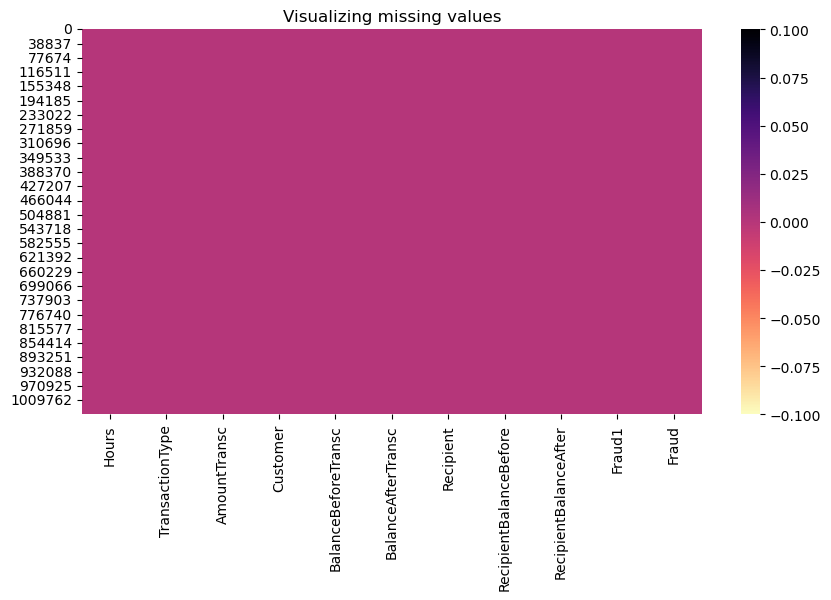

In [24]:
# Visualize missing values

plt.figure(figsize = (10, 5))
plt.title('Visualizing missing values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'magma_r')

#cbar ==> colour bar talks about the axis, values
#cmap ==> colour map takes care of the colours variation

In [25]:
# statistical descriptive analysis of the numerical data

df.describe().astype('int')

,Hours,AmountTransc,BalanceBeforeTransc,BalanceAfterTransc,RecipientBalanceBefore,RecipientBalanceAfter,Fraud1
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


### Exploratory Data Analysis: Relationship, Insights & Visualization

- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

#### Univariate Analysis
- Considering one feature or variables

- Univariate analysis is used to analyze the data of single variable. Here we will analyze using histplot

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import os

In [27]:
# df.drop('Fraud1', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Hours                   1048575 non-null  int64  
 1   TransactionType         1048575 non-null  object 
 2   AmountTransc            1048575 non-null  float64
 3   Customer                1048575 non-null  object 
 4   BalanceBeforeTransc     1048575 non-null  float64
 5   BalanceAfterTransc      1048575 non-null  float64
 6   Recipient               1048575 non-null  object 
 7   RecipientBalanceBefore  1048575 non-null  float64
 8   RecipientBalanceAfter   1048575 non-null  float64
 9   Fraud1                  1048575 non-null  int64  
 10  Fraud                   1048575 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 88.0+ MB


In [28]:
# Downcast numerical columns with smaller dtype
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['TransactionType'] = df['TransactionType'].astype('category')

In [29]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Number of transactions')

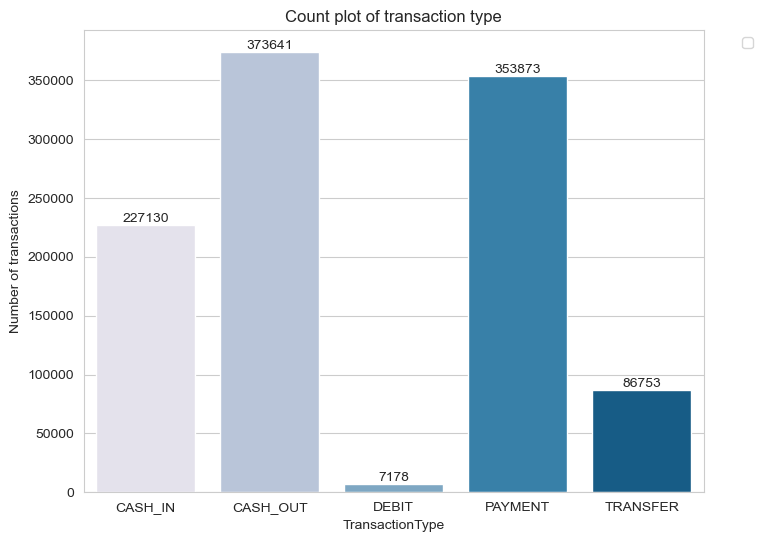

In [30]:
ax = sns.countplot(x='TransactionType', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')


- Cash out is the most numerous transaction type, followed by payment, cash in, transfer and debit types.

Text(0.5, 1.0, 'Distribution of transaction amount')

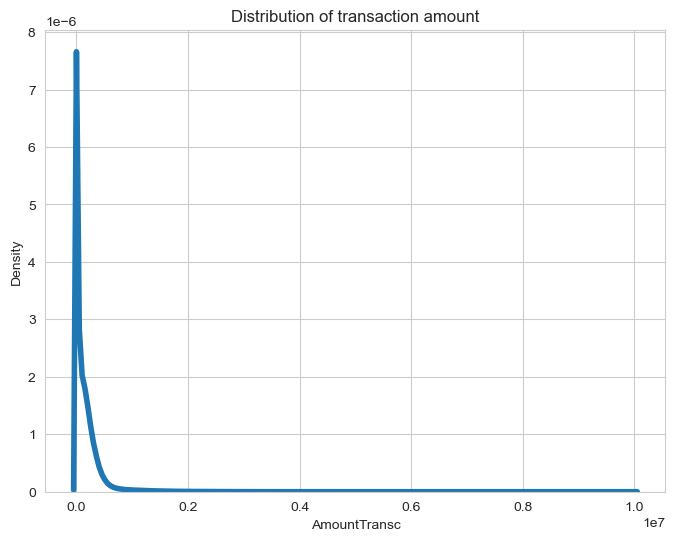

In [31]:
sns.kdeplot(df['AmountTransc'], linewidth=4)
plt.title('Distribution of transaction amount')

- The distribution of transaction amounts is right skewed.
- This indicates that most values are clustered around the left tail of the distribution, with the longer right tail.
(mode < median < mean)

In [32]:
df['Customer'].value_counts()

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: Customer, Length: 1048317, dtype: int64

- There are 1048317 initial customers, and every step has at least 1 occurrence.

Text(0.5, 1.0, 'Distribution of transaction amount')

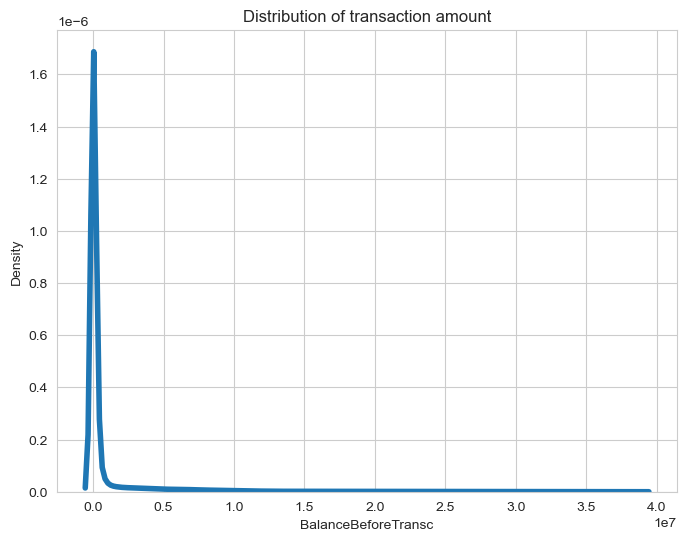

In [33]:
sns.kdeplot(df['BalanceBeforeTransc'], linewidth=4)
plt.title('Distribution of transaction amount')

- The distribution of pre-transaction balances of the initial customers is right skewed.

Text(0.5, 1.0, 'Distribution of transaction amount')

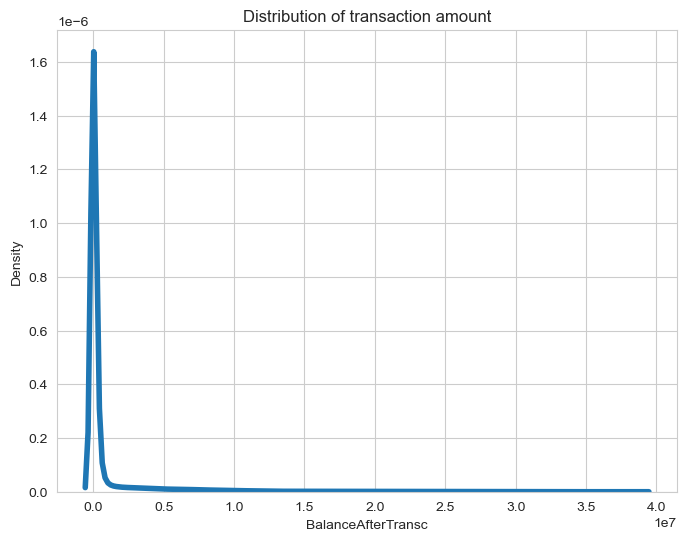

In [34]:
sns.kdeplot(df['BalanceAfterTransc'], linewidth=4)
plt.title('Distribution of transaction amount')

- The distribution of post-transaction balances of the initial customers is right skewed.

In [35]:
df['Recipient'].value_counts()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: Recipient, Length: 449635, dtype: int64

- There are 449635 recipients, and every step has at least 1 occurrence.

Text(0.5, 1.0, 'Distribution of transaction amount')

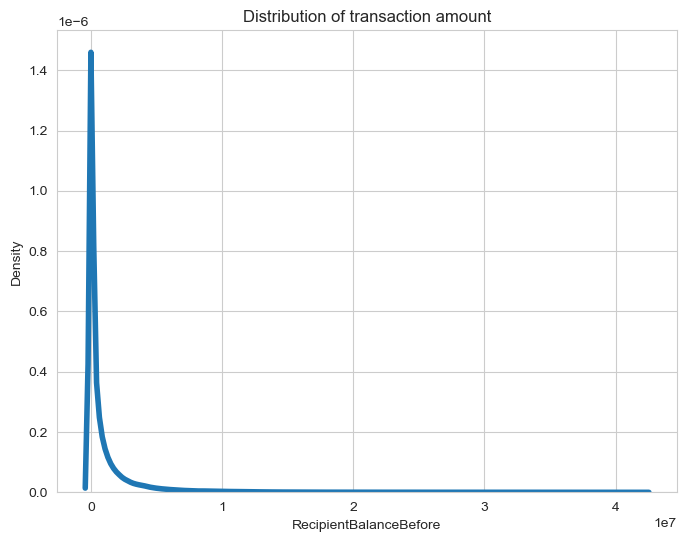

In [36]:
sns.kdeplot(df['RecipientBalanceBefore'], linewidth=4)
plt.title('Distribution of transaction amount')

- The distribution of pre-transaction balances of the recipient is right skewed.

Text(0.5, 1.0, 'Distribution of transaction amount')

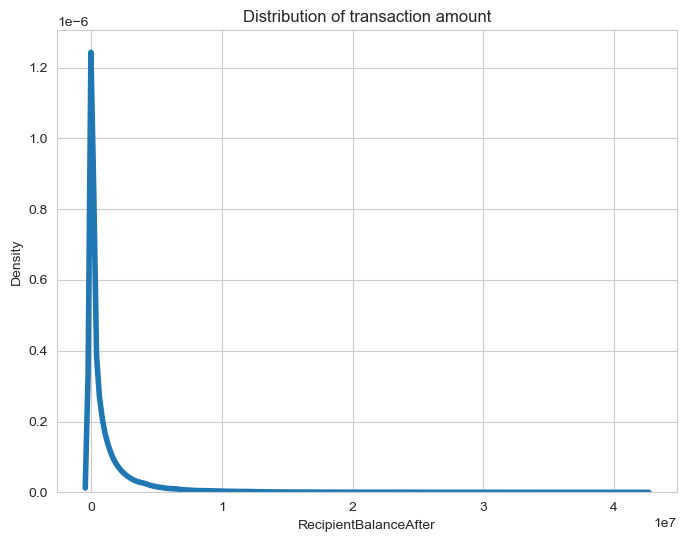

In [37]:
sns.kdeplot(df['RecipientBalanceAfter'], linewidth=4)
plt.title('Distribution of transaction amount')

- The distribution of post-transaction balances of the recipient is right skewed.

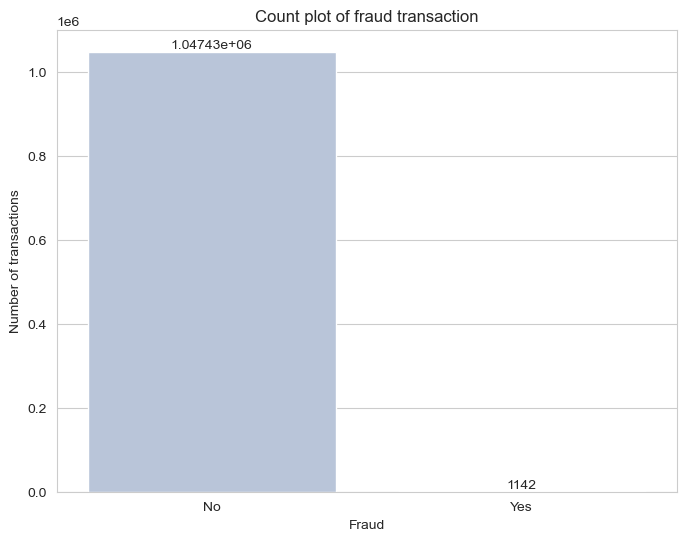

In [38]:
ax = sns.countplot(x='Fraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

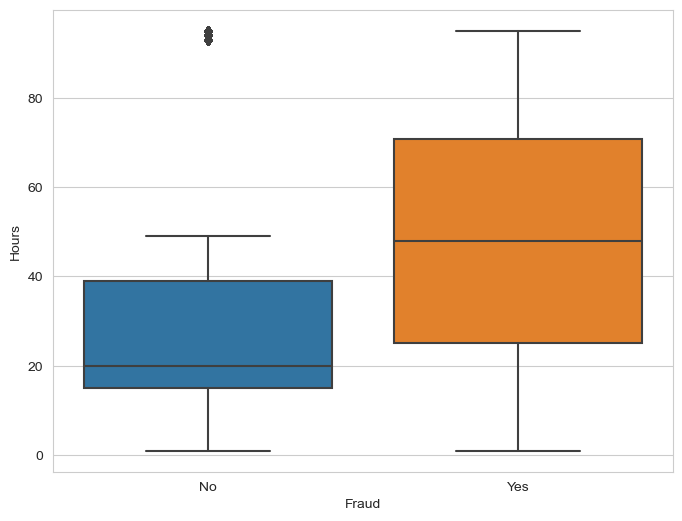

In [39]:
# view the distribution of Hours by Recipient

sns.boxplot(x = df.Fraud, y = df.Hours, data = df)

plt.show()

- There are much more non-fraudulent transactions than fraudulent transactions.

### Bivariate Analysis
- Comparing two features

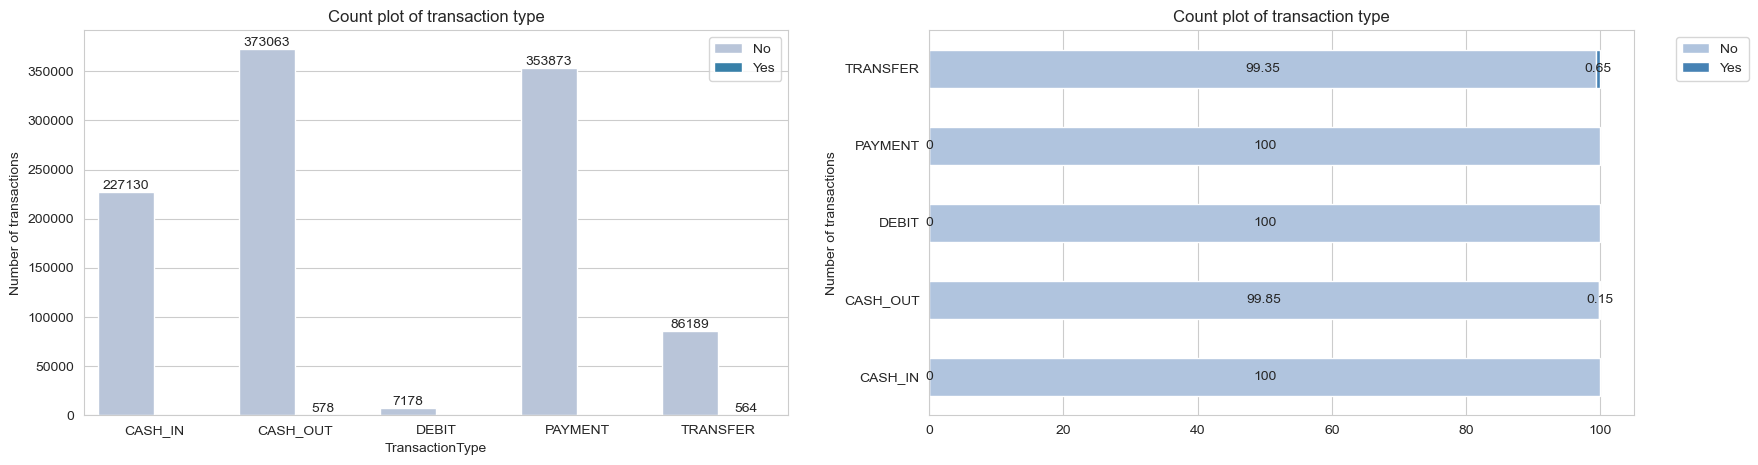

In [40]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='TransactionType', data=df, hue='Fraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['TransactionType', 'Fraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

- Fraudulent transactions only occur in debit and transfer types

Text(0, 0.5, 'Number of transactions')

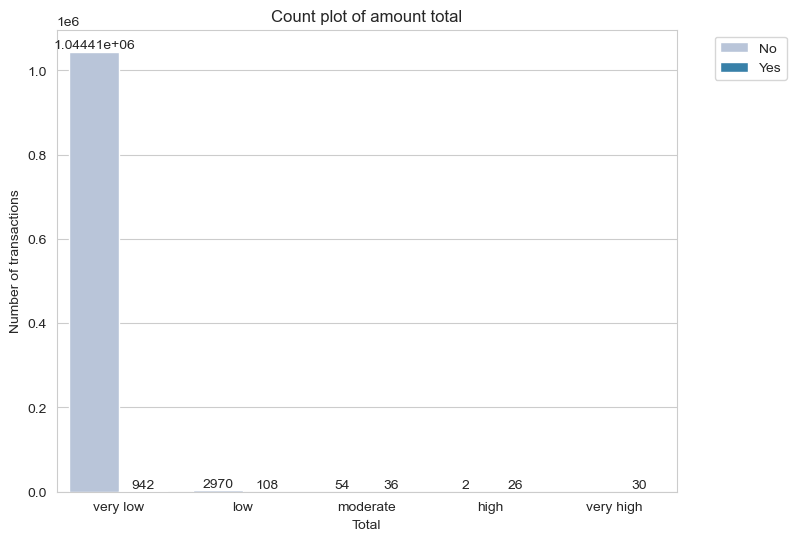

In [41]:
df['Total'] = pd.cut(df['AmountTransc'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='Total', data=df, hue='Fraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount total')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

- All fraudulent transactions fall into the category of very low amounts.
- This suggests that in most cases, small transactions are more prone to fraudulent transactions.

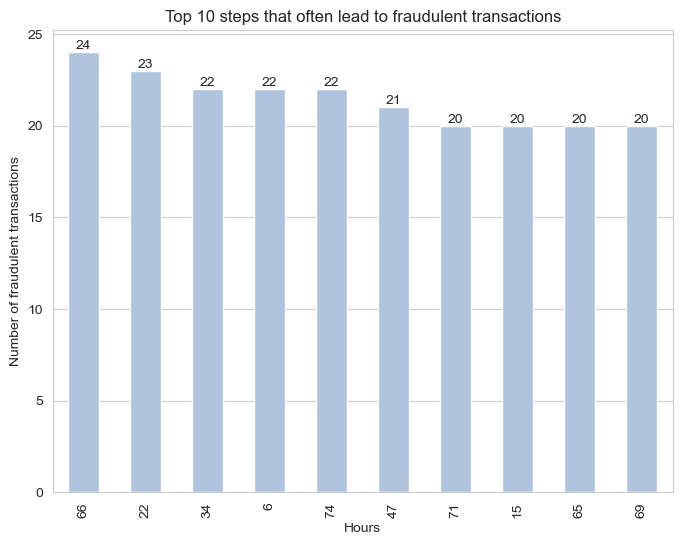

In [42]:
df1 = df[df['Fraud']=='Yes']
df2 = df1['Hours'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Hours')
plt.grid(axis='x')

del ax, df2

- Hours 212 has the highest number of fraudulent transactions, 40 cases.
- This indicates that Hours 212 is the hour that will most likely lead to fraudulent transactions.

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

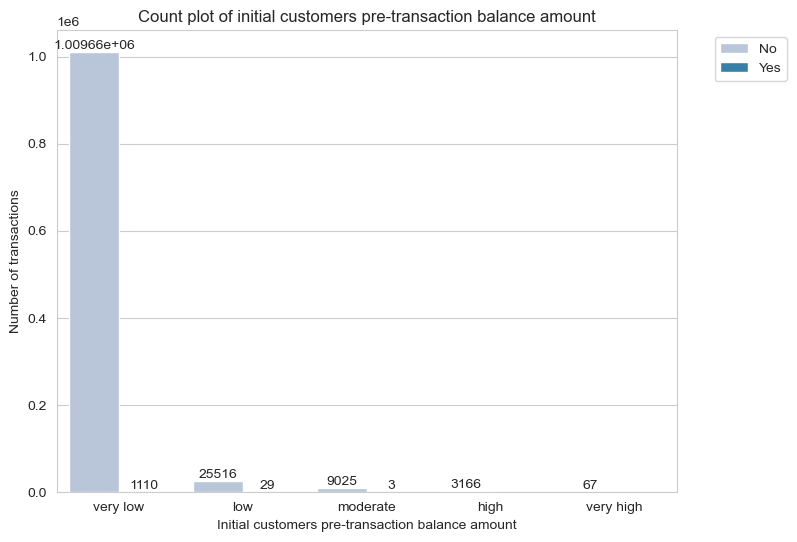

In [43]:
df['BalanceBeforeTransc_amount'] = pd.cut(df['BalanceBeforeTransc'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='BalanceBeforeTransc_amount', data=df, hue='Fraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

- Initial customers with very low pre-transaction balances has the highest number of fraudulent transactions.
- This means that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.

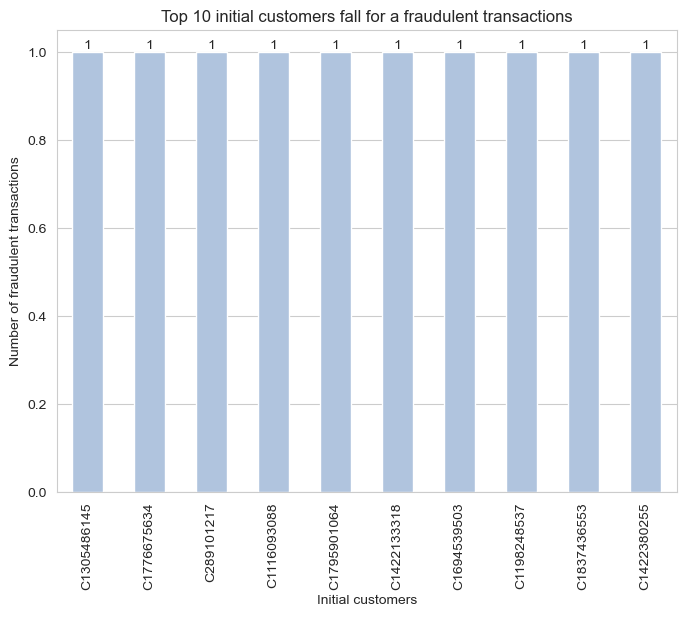

In [44]:
df2 = df1['Customer'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

- Initial customers are scammed of at most one for a fraudulent transaction.

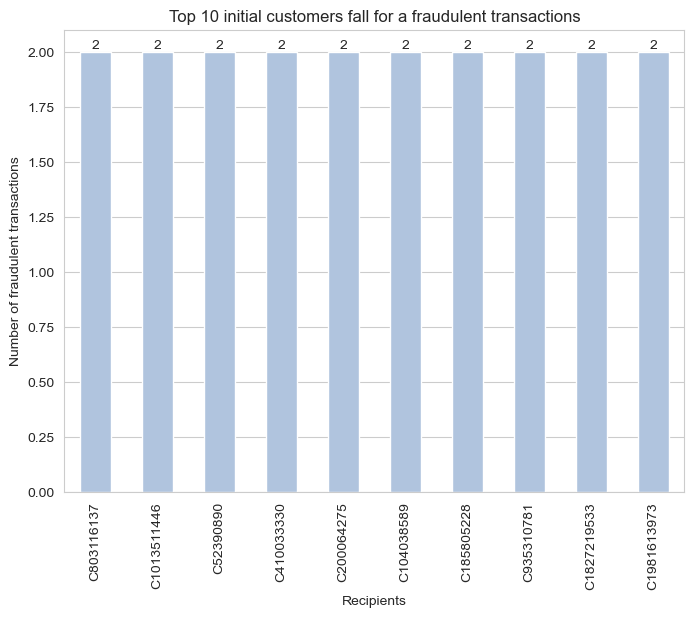

In [45]:
df2 = df1['Recipient'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

- Suspicious recipients only have a maximum of 2 involved fraudulent transactions.

Text(0.5, 0, 'Recipient pre-transaction balance amount')

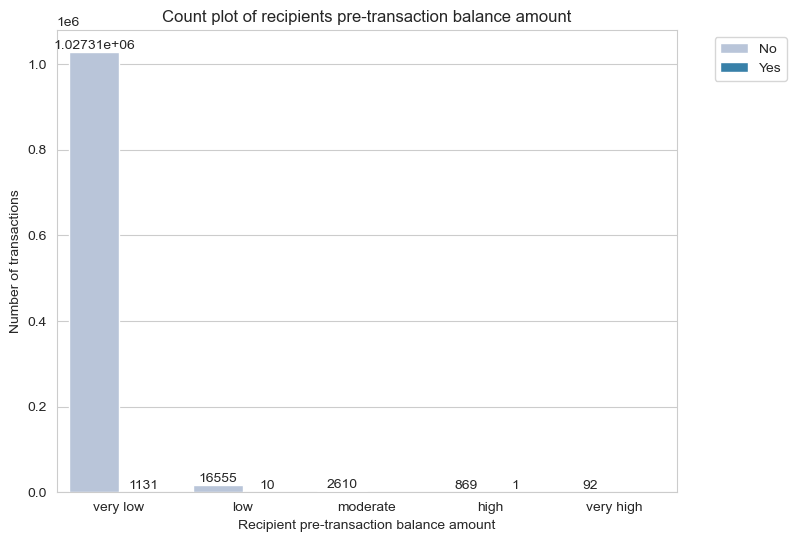

In [46]:
df['RecipientBalanceBefore_amount'] = pd.cut(df['RecipientBalanceBefore'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='RecipientBalanceBefore_amount', data=df, hue='Fraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

- Recipients with very low pre-transaction balances has the highest number of fraudulent transactions.
- This implies that recipients with very low pre-transaction balances may be more susceptible to fraudulent transactions.

###  Multivariate data visualization

Text(0.5, 1.0, 'Correlation')

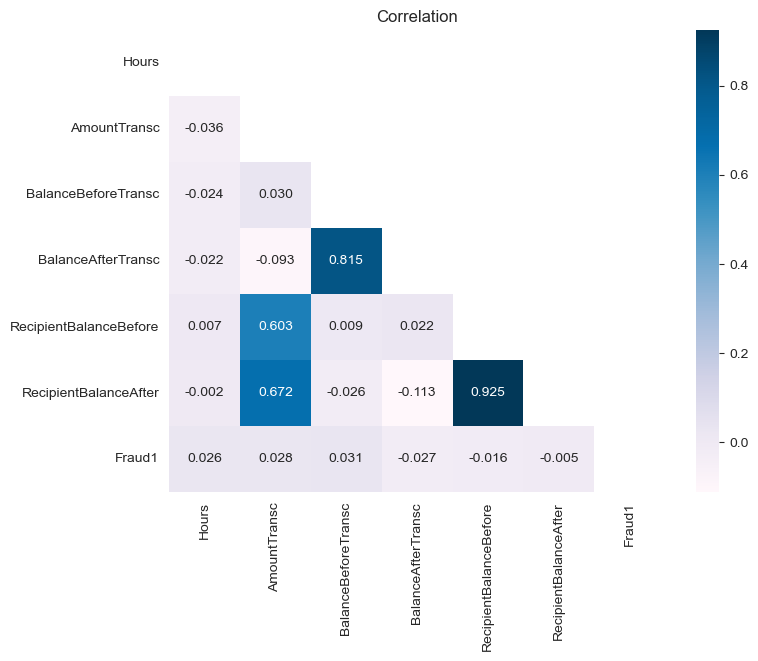

In [47]:
corr_matrix = df.corr('spearman')
sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

- BalanceBeforeTransc and BalanceAfterTransc has strong positive relationship.
- RecipientBalanceBefore and RecipientBalanceAfter has strong positive relationship.
- BalanceBeforeTransc and AmountTransc has weak positive relationship.
- BalanceAfterTransc and AmountTransc has moderate positive relationship.

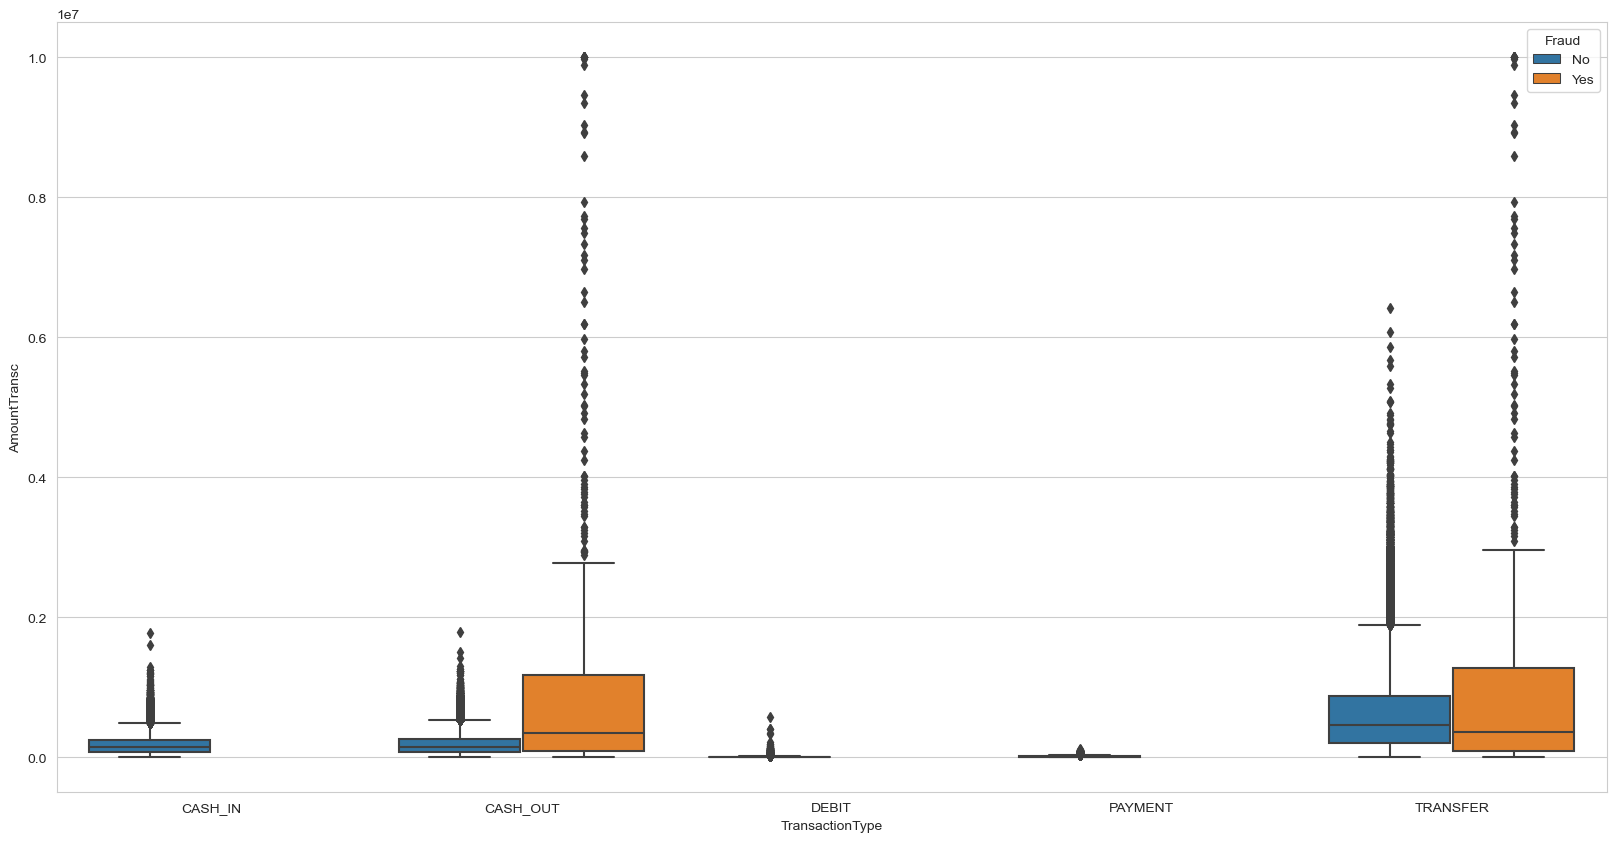

In [48]:
# Visualize TransactionType and Fraud by AmountTransc

plt.figure(figsize = (20, 10))
sns.boxplot(x = 'TransactionType', y = 'AmountTransc', data = df, hue = 'Fraud')
plt.show()

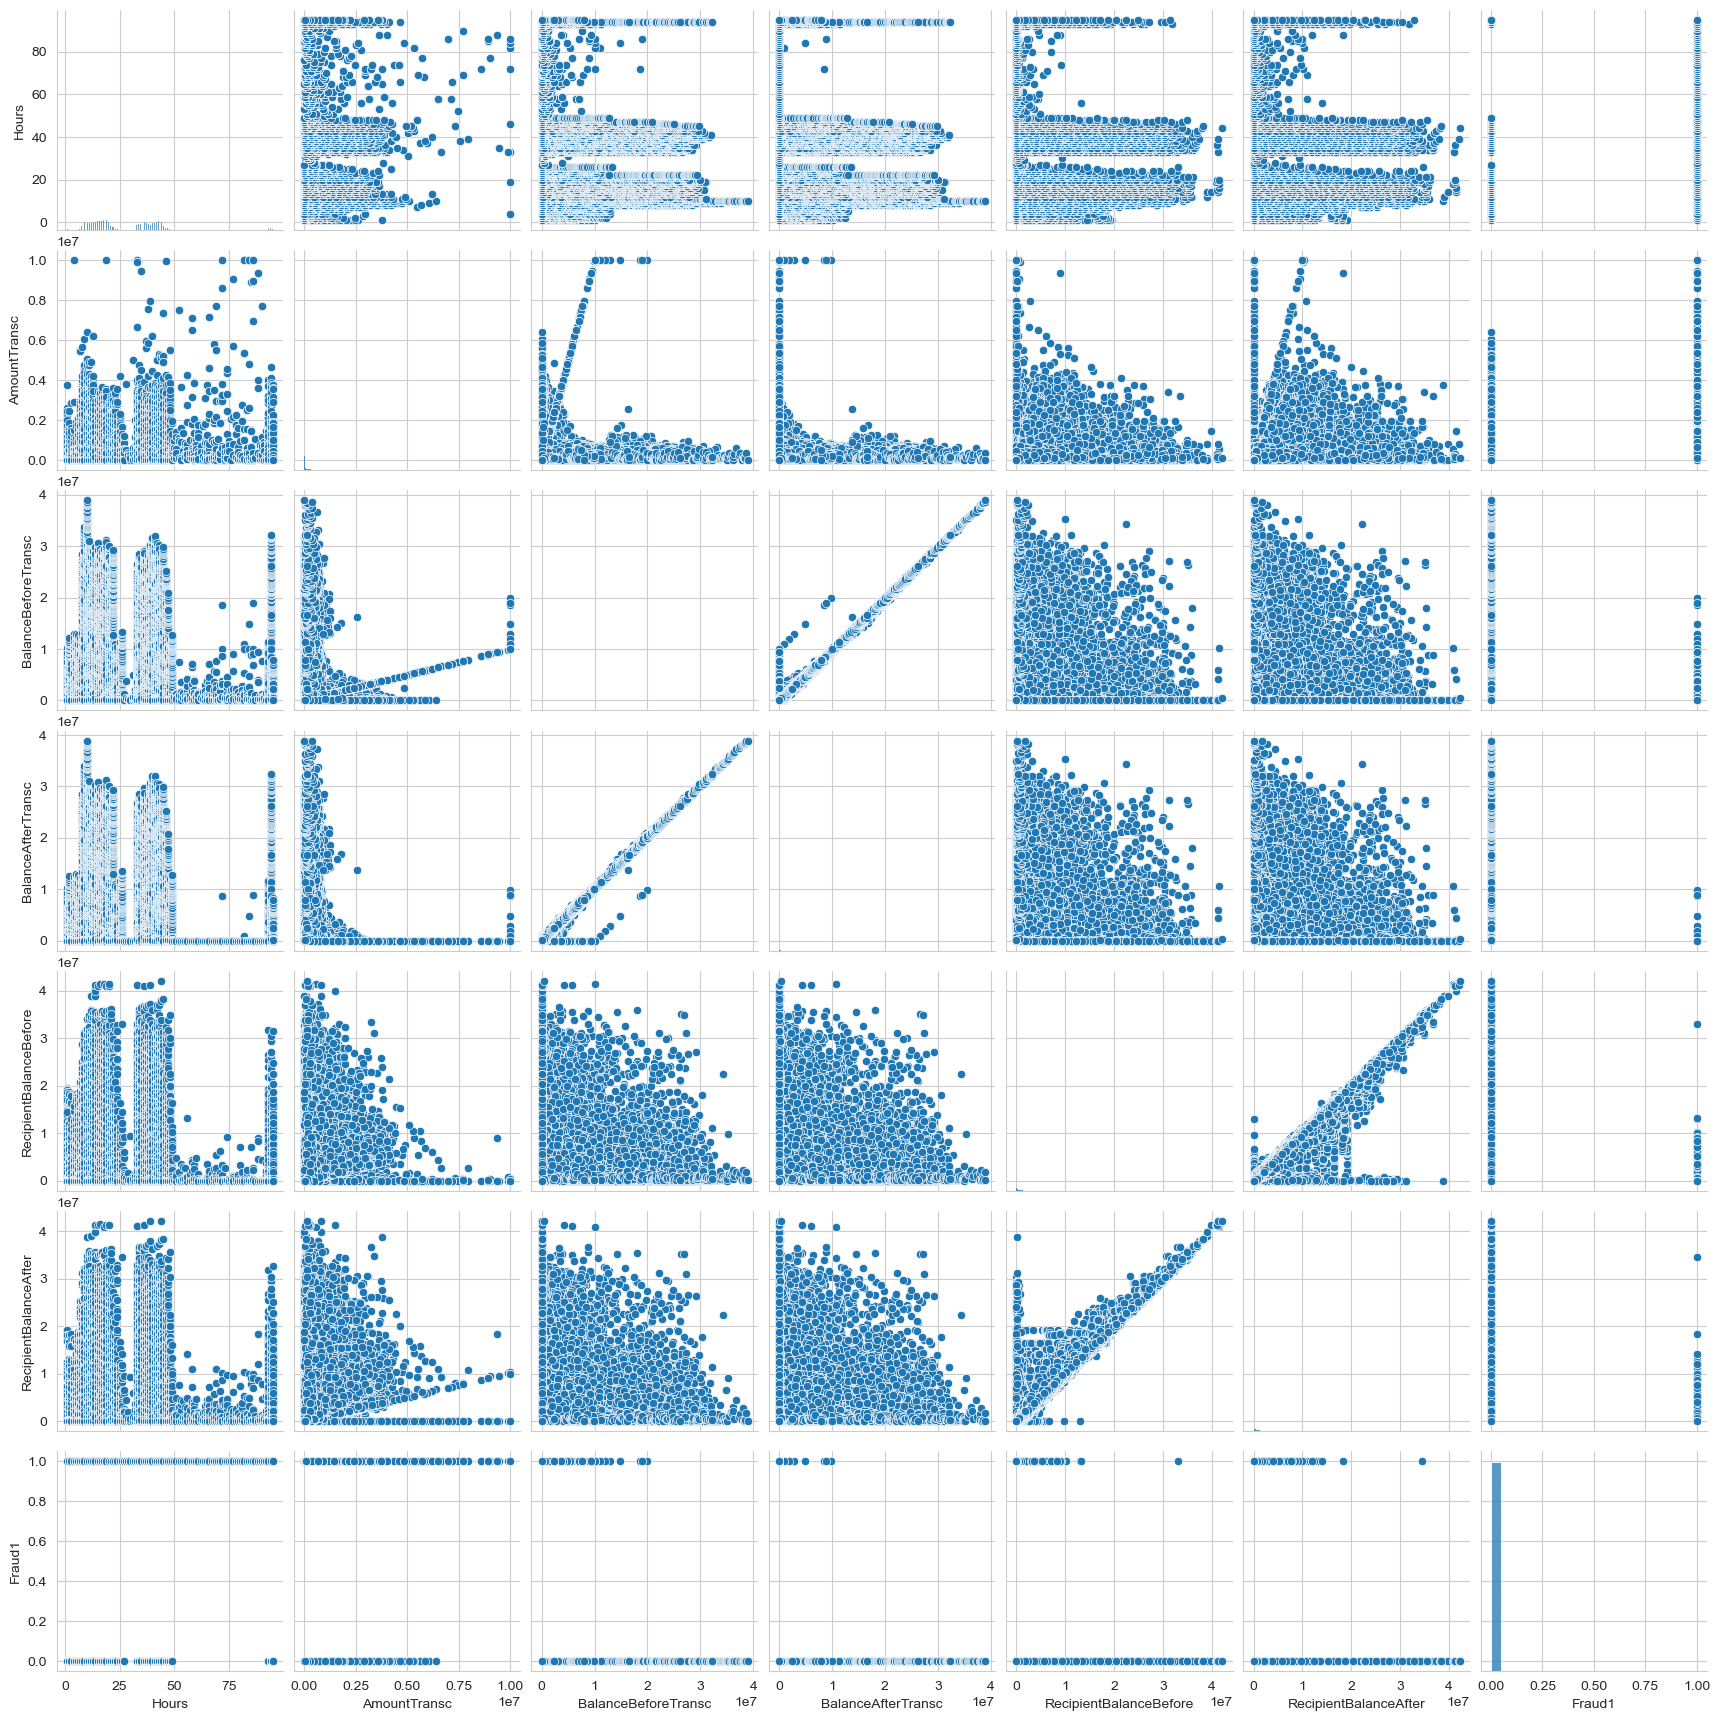

In [49]:
# pairing two features by capturing the entire column using charts

sns.pairplot(data = df)
plt.show()

### Machine Learning and Model Building

In [50]:

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [51]:
# Data preprocessing
df['TransactionType'] = df['TransactionType'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [52]:
X = df.copy()
X.drop(['Customer', 'Fraud', 'BalanceAfterTransc', 'Recipient', 'RecipientBalanceAfter', 'Total', 'BalanceBeforeTransc_amount', 'RecipientBalanceBefore_amount'], axis=1, inplace=True)
y = X.pop('Fraud1')

## splitting our dataset into test and train in a 3:7 ratio

In [53]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42 )
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (734002, 5)
x_test: (314573, 5)
y_train: (734002,)
y_test: (314573,)


### One hot encoding

- Due to the large dataset, Random Forest and Logistic Regression with balanced class weight are used to identify online payment fraud.

### Implementing the different Models to see which one best detects the fraudulent transactions

## Importing desicion tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
Dc_model= DecisionTreeClassifier()
Dc_model.fit(x_train, y_train)

DecisionTreeClassifier()

#### Lets see how the algorithm compares to the first ten instatnces from our dataset


In [55]:
Dc_pred= Dc_model.predict(x_test)
print(y_test.head().tolist())
print(Dc_pred[:10])

[0, 0, 0, 0, 0]
[0 0 0 0 0 0 0 0 0 0]


###### Let's use accuracy score to test the performance of the algorithm


In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Dc_pred, y_test)*100)

99.93324284029462


## KNeighborsClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
K_model= KNeighborsClassifier()
K_model.fit(x_train, y_train)

KNeighborsClassifier()

###### Lets see how the algorithm compares to the first ten instatnces from our dataset


In [58]:
K_pred= K_model.predict(x_test)
print(y_test.head().tolist())
print(K_pred[:10])

C:\Users\GNLD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[0, 0, 0, 0, 0]
[0 0 0 0 0 0 0 0 0 0]


###### Let's use accuracy score to test the performance of the algorithm


In [59]:
K_preds= K_model.predict(x_test)
print(accuracy_score(K_preds, y_test)*100)

C:\Users\GNLD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


99.91925562588017


## RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
Rf_model= RandomForestClassifier()
Rf_model.fit(x_train, y_train)

RandomForestClassifier()


###### Lets see how the algorithm compares to the first ten instatnces from our dataset

In [61]:
Rf_pred= Rf_model.predict(x_test)
print(y_test.head().tolist())
print(Rf_pred[:10])

[0, 0, 0, 0, 0]
[0 0 0 0 0 0 0 0 0 0]


###### Let's use accuracy score to test the performance of the algorithm

In [62]:
print(accuracy_score(Rf_pred, y_test)*100)

99.96503196396385


In [63]:
# Decision Tree
dc_accuracy = accuracy_score(y_test, Dc_pred)
dc_precision = precision_score(y_test, Dc_pred)
dc_recall = recall_score(y_test, Dc_pred)
dc_f1 = f1_score(y_test, Dc_pred)
dc_roc_auc = roc_auc_score(y_test, Dc_pred)

# Random Forest
Rf_accuracy = accuracy_score(y_test, Rf_pred)
Rf_precision = precision_score(y_test, Rf_pred)
Rf_recall = recall_score(y_test, Rf_pred)
Rf_f1 = f1_score(y_test, Rf_pred)
Rf_roc_auc = roc_auc_score(y_test, Rf_pred)

# K-Nearest Neighbors
k_accuracy = accuracy_score(y_test, K_preds)
k_precision = precision_score(y_test, K_preds)
k_recall = recall_score(y_test, K_preds)
k_f1 = f1_score(y_test, K_preds)
k_roc_auc = roc_auc_score(y_test, K_preds)

In [64]:
print("Decision Tree:")
print("Accuracy:", dc_accuracy)
print("Precision:", dc_precision)
print("Recall:", dc_recall)
print("F1-Score:", dc_f1)
print("ROC-AUC:", dc_roc_auc)
print()

print("Random Forest:")
print("Accuracy:", Rf_accuracy)
print("Precision:", Rf_precision)
print("Recall:", Rf_recall)
print("F1-Score:", Rf_f1)
print("ROC-AUC:", Rf_roc_auc)
print()

print("K-Nearest Neighbors:")
print("Accuracy:", k_accuracy)
print("Precision:", k_precision)
print("Recall:", k_recall)
print("F1-Score:", k_f1)
print("ROC-AUC:", k_roc_auc)

Decision Tree:
Accuracy: 0.9993324284029462
Precision: 0.6893732970027248
Recall: 0.7249283667621776
F1-Score: 0.7067039106145252
ROC-AUC: 0.8622827841245075

Random Forest:
Accuracy: 0.9996503196396385
Precision: 0.9760956175298805
Recall: 0.7020057306590258
F1-Score: 0.8166666666666665
ROC-AUC: 0.8509933180002193

K-Nearest Neighbors:
Accuracy: 0.9991925562588017
Precision: 0.6970954356846473
Recall: 0.4813753581661891
F1-Score: 0.5694915254237288
ROC-AUC: 0.7405715199100205


### Comparing our different Algorithms and their performance

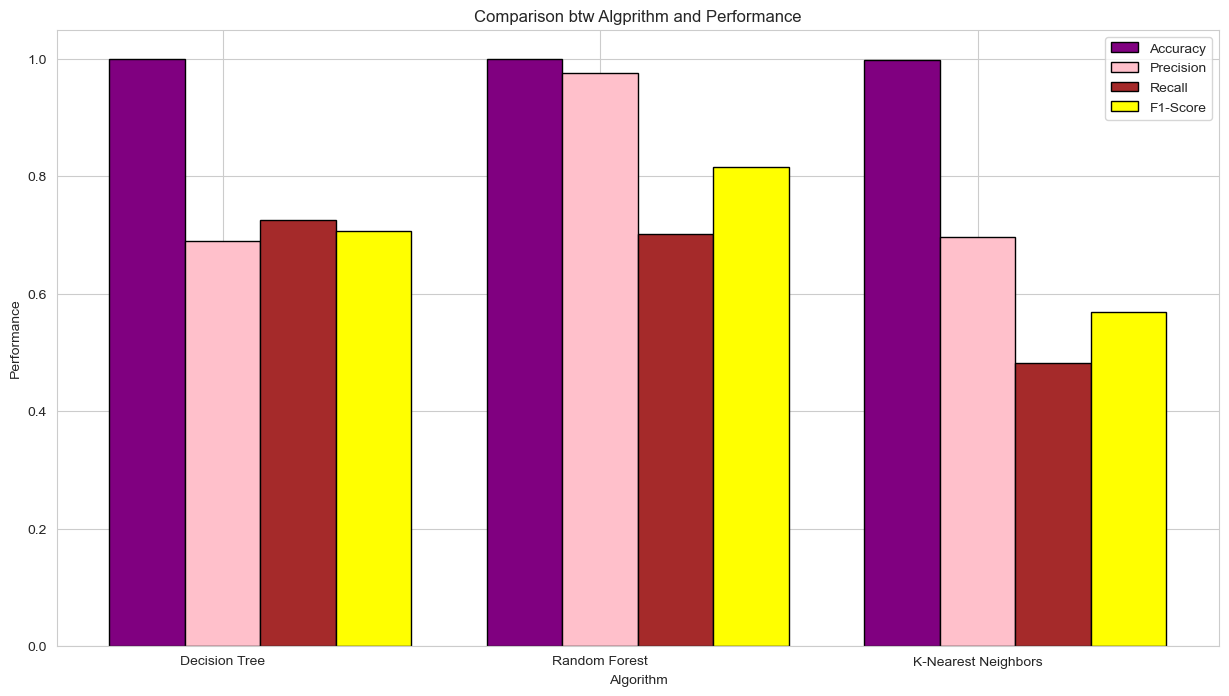

In [65]:
# Define the performance metrics for each algorithm
accuracy = [dc_accuracy, Rf_accuracy, k_accuracy]
precision = [dc_precision, Rf_precision, k_precision]
recall = [dc_recall, Rf_recall, k_recall]
f1_score = [dc_f1, Rf_f1, k_f1]
roc_auc = [dc_roc_auc, Rf_roc_auc, k_roc_auc]

# Define the algorithm names
algorithms = ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the performance metrics
plt.figure(figsize=(15, 8))
plt.bar(r1, accuracy, color='purple', width=bar_width, edgecolor='black', label='Accuracy')
plt.bar(r2, precision, color='pink', width=bar_width, edgecolor='black', label='Precision')
plt.bar(r3, recall, color='brown', width=bar_width, edgecolor='black', label='Recall')
plt.bar(r4, f1_score, color='yellow', width=bar_width, edgecolor='black', label='F1-Score')

# Add x-axis labels, y-axis label, and chart title
plt.xlabel('Algorithm')
plt.ylabel('Performance')
plt.title('Comparison btw Algprithm and Performance')
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Confusion Matrix

In [66]:
seed = 42
np.random.seed(seed)
random.seed(seed)

### Random Forest Classifier Confusion Matrix

Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       1.00      1.00      1.00    314323
    Fraud [1]       0.69      0.96      0.80       250

     accuracy                           1.00    314573
    macro avg       0.85      0.98      0.90    314573
 weighted avg       1.00      1.00      1.00    314573
 



Text(0.5, 0, 'False Positive Rate')

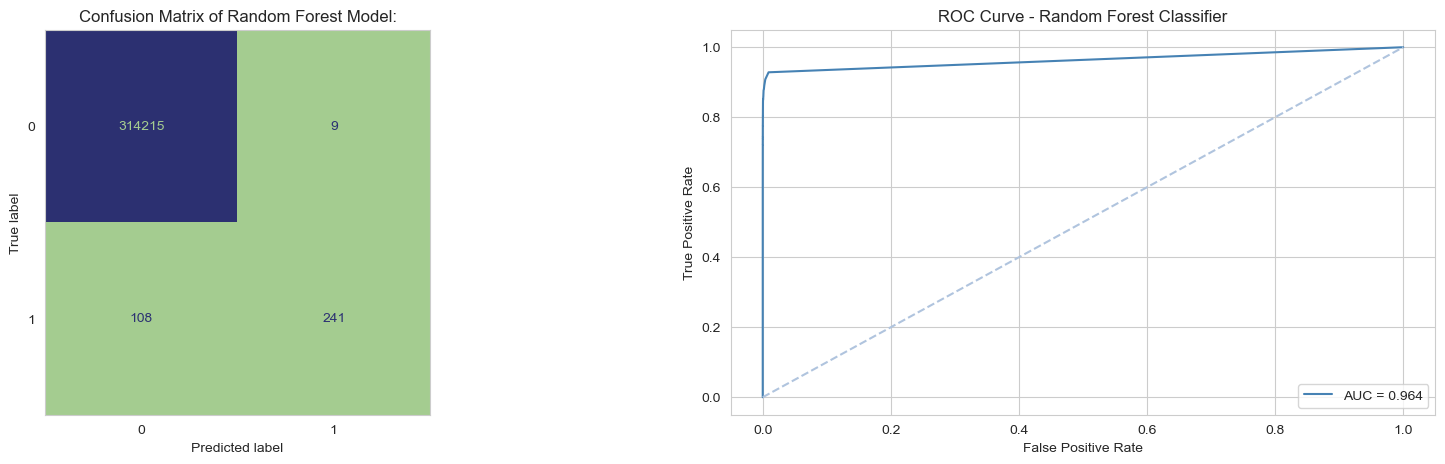

In [67]:
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_score = model.predict_proba(x_test)[:,1]
print('Random Forest Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')



fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)                       
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

### Decision Tree Classifier Confusion Matrix

Decision Tree Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       1.00      1.00      1.00    314241
    Fraud [1]       0.74      0.77      0.75       332

     accuracy                           1.00    314573
    macro avg       0.87      0.89      0.88    314573
 weighted avg       1.00      1.00      1.00    314573
 



Text(0.5, 0, 'False Positive Rate')

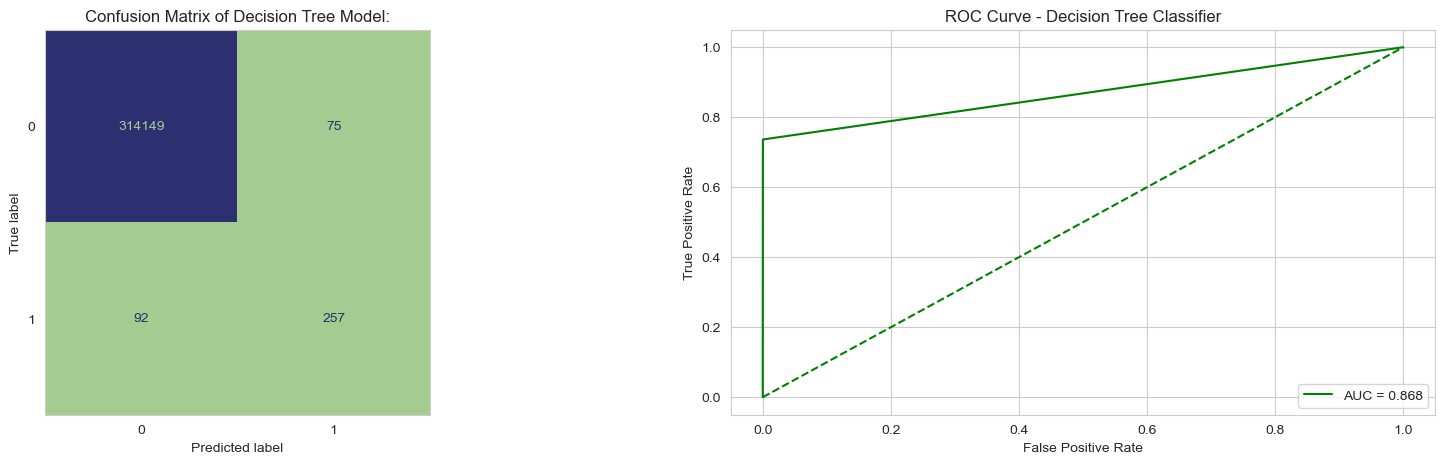

In [68]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=seed)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_score = model.predict_proba(x_test)[:,1]
print('Decision Tree Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')



fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Decision Tree Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)                       
ax[1].set_title('ROC Curve - Decision Tree Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='green')
ax[1].plot([0,1],[0,1],'--', c='green')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

### Observations


- The best performing model is Random Forest for identifying fraudulent and non-fraudulent payments, as the AUC is 0.964, which is close to 1. This means it has a good separability measure, and the model has an 99.96% chance of being able to distinguish between positive and negative classes..

### END OF FINAL PROJECT